In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core/')
sys.path.append('/kaggle/input/my-flg-library/')
import flg_support as fls
import flg_unet
import flg_numerics
import importlib
import numpy as np
import matplotlib.pyplot as plt
import time
import copy

MODE!


In [2]:
all_data = fls.load_all_train_data()
np.random.default_rng(seed=0).shuffle(all_data)

# Pick N tomograms with 1 motor and N tomograms with 0 motors as validation set
N=100
n_motors = np.array([len(d.labels) for d in all_data])
inds_zero = np.argwhere(n_motors==0)[:N,0]
inds_one = np.argwhere(n_motors==1)[:N,0]
inds_test = np.concatenate((inds_zero,inds_one))
inds_train = np.setdiff1d(np.arange(len(n_motors)), inds_test)
inds_test.shape, inds_train.shape

train_data = []
for i in inds_train:
    train_data.append(all_data[i])
test_data = []
for i in inds_test:
    test_data.append(all_data[i])
np.random.default_rng(seed=0).shuffle(test_data)
len(train_data), len(test_data)

(444, 200)

0 1 2 3 4 5 6 7 8 9 CPU times: user 5.91 s, sys: 4.38 s, total: 10.3 s
Wall time: 24.9 s


[0.9982866287231446,
 0.9985457420349121,
 0.998776912689209,
 0.9984731674194336,
 0.9984512329101562,
 0.9985740661621094,
 0.9986859321594238,
 0.9983063697814941,
 0.9985708236694336,
 0.998169231414795]

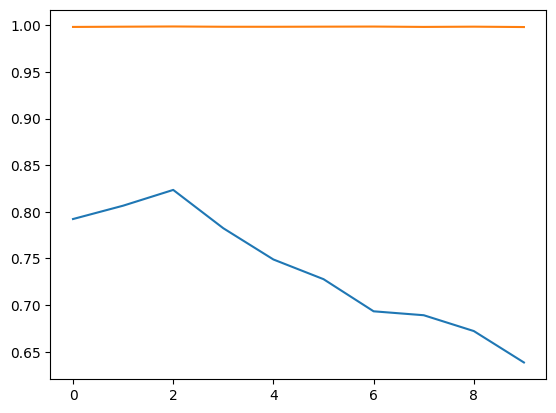

In [3]:
%%time
fls.profiling=False
model = flg_unet.UNetModel()
model.n_epochs = 10
model.train(train_data)
plt.figure()
plt.plot(model.train_loss_list1)
plt.plot(model.train_loss_list2)
model.train_loss_list2

In [4]:
%%time
importlib.reload(flg_unet)
fls.profiling=True
model = flg_unet.UNetModel()
dataset = model.dataset
dataset.data_list = copy.deepcopy(train_data)
for (i,d) in enumerate(dataset):
    if i>200:
        break

Timer unit: 1e-09 s

Total time: 0.0709259 s
File: /flagellar/code/core/flg_unet.py
Function: get_next at line 57

Line #      Hits         Time  Per Hit   % Time  Line Contents
    57                                                   @fls.profile_each_line
    58                                                   def get_next():
    59                                                       #t=time.time()
    60                                                       # Determine which location in which tomogram we will use
    61         1       2830.0   2830.0      0.0              if i_set%(self.n_positive+self.n_random)<self.n_positive:
    62                                                           # Center around a motor
    63         1        160.0    160.0      0.0                  while True:
    64         1      22171.0  22171.0      0.0                      row = rng.integers(0,len(all_train_labels))
    65         1     230448.0 230448.0      0.3                      if not a